# Plot Templates

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from swarm_sampling import energy, f

In [127]:
mu0, mu1, mu2, mu3 = -10,0,10,30
sig0, sig1, sig2, sig3 = 1, 2, 2, 1
f = lambda x: 0.25*norm(mu0, sig0).pdf(x) + 0.25*norm(mu1, sig1).pdf(x) + 0.25*norm(mu2, sig2).pdf(x) + 0.25*norm(mu3, sig3).pdf(x)


### Case

In [128]:
data_folder = 'results/1D_multimodal/swarm'

num_chains = 6
num_epochs = 100000

#### Loading in the results

In [129]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'{data_folder}/process_{i}.npy')
    
print(all_results.shape)

(6, 100000, 2)


#### Plotting the results

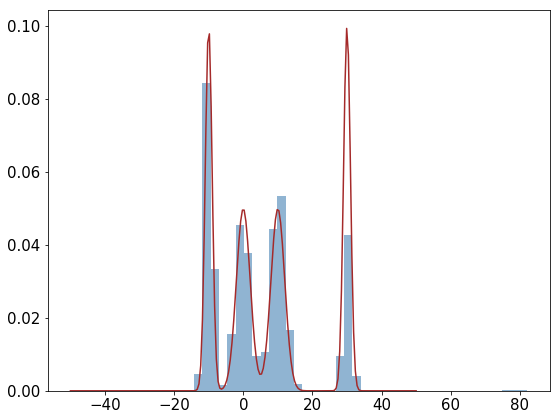

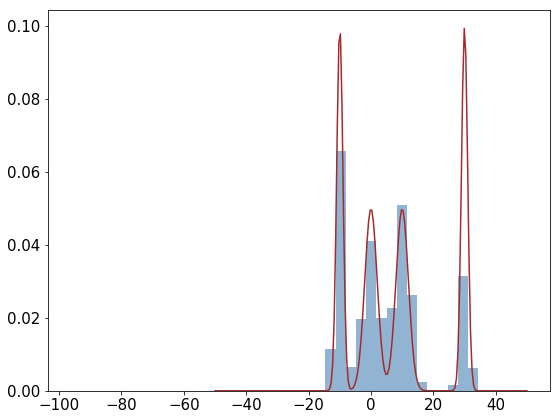

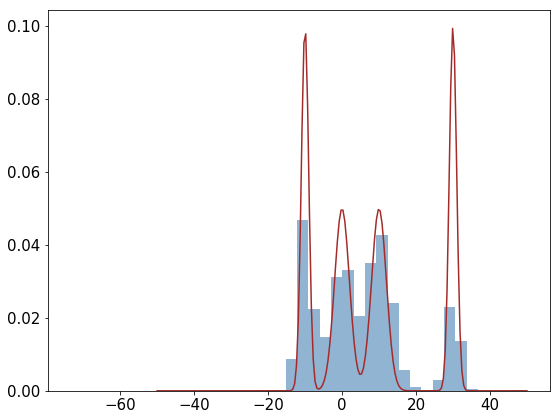

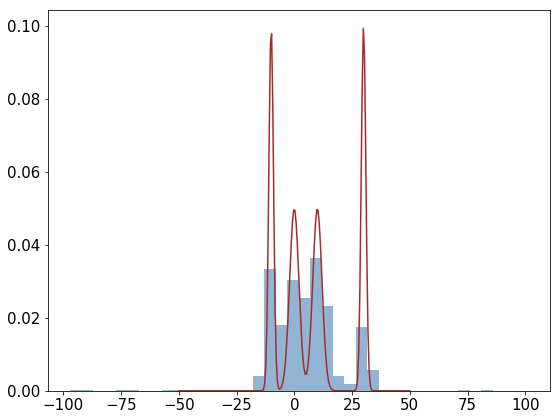

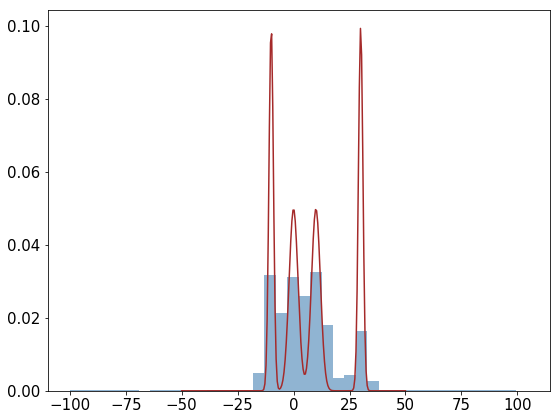

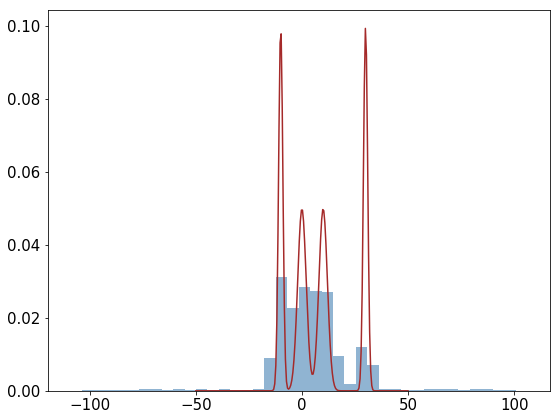

In [131]:
#accumulator = all_results[0]

xgrid = np.linspace(-50,50,200)


for i in range(num_chains):
    accumulator = all_results[i]
    plt.figure(figsize=(9,7))
    plt.hist(accumulator[:,0], bins=40, density=True, color="steelblue", alpha=0.6)
    plt.plot(xgrid, f(xgrid), label='f(x)', color="brown")

    #plt.xlim(-40,60)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.savefig(f"{data_folder}/histogram_{i}.png", bbox_inches='tight')

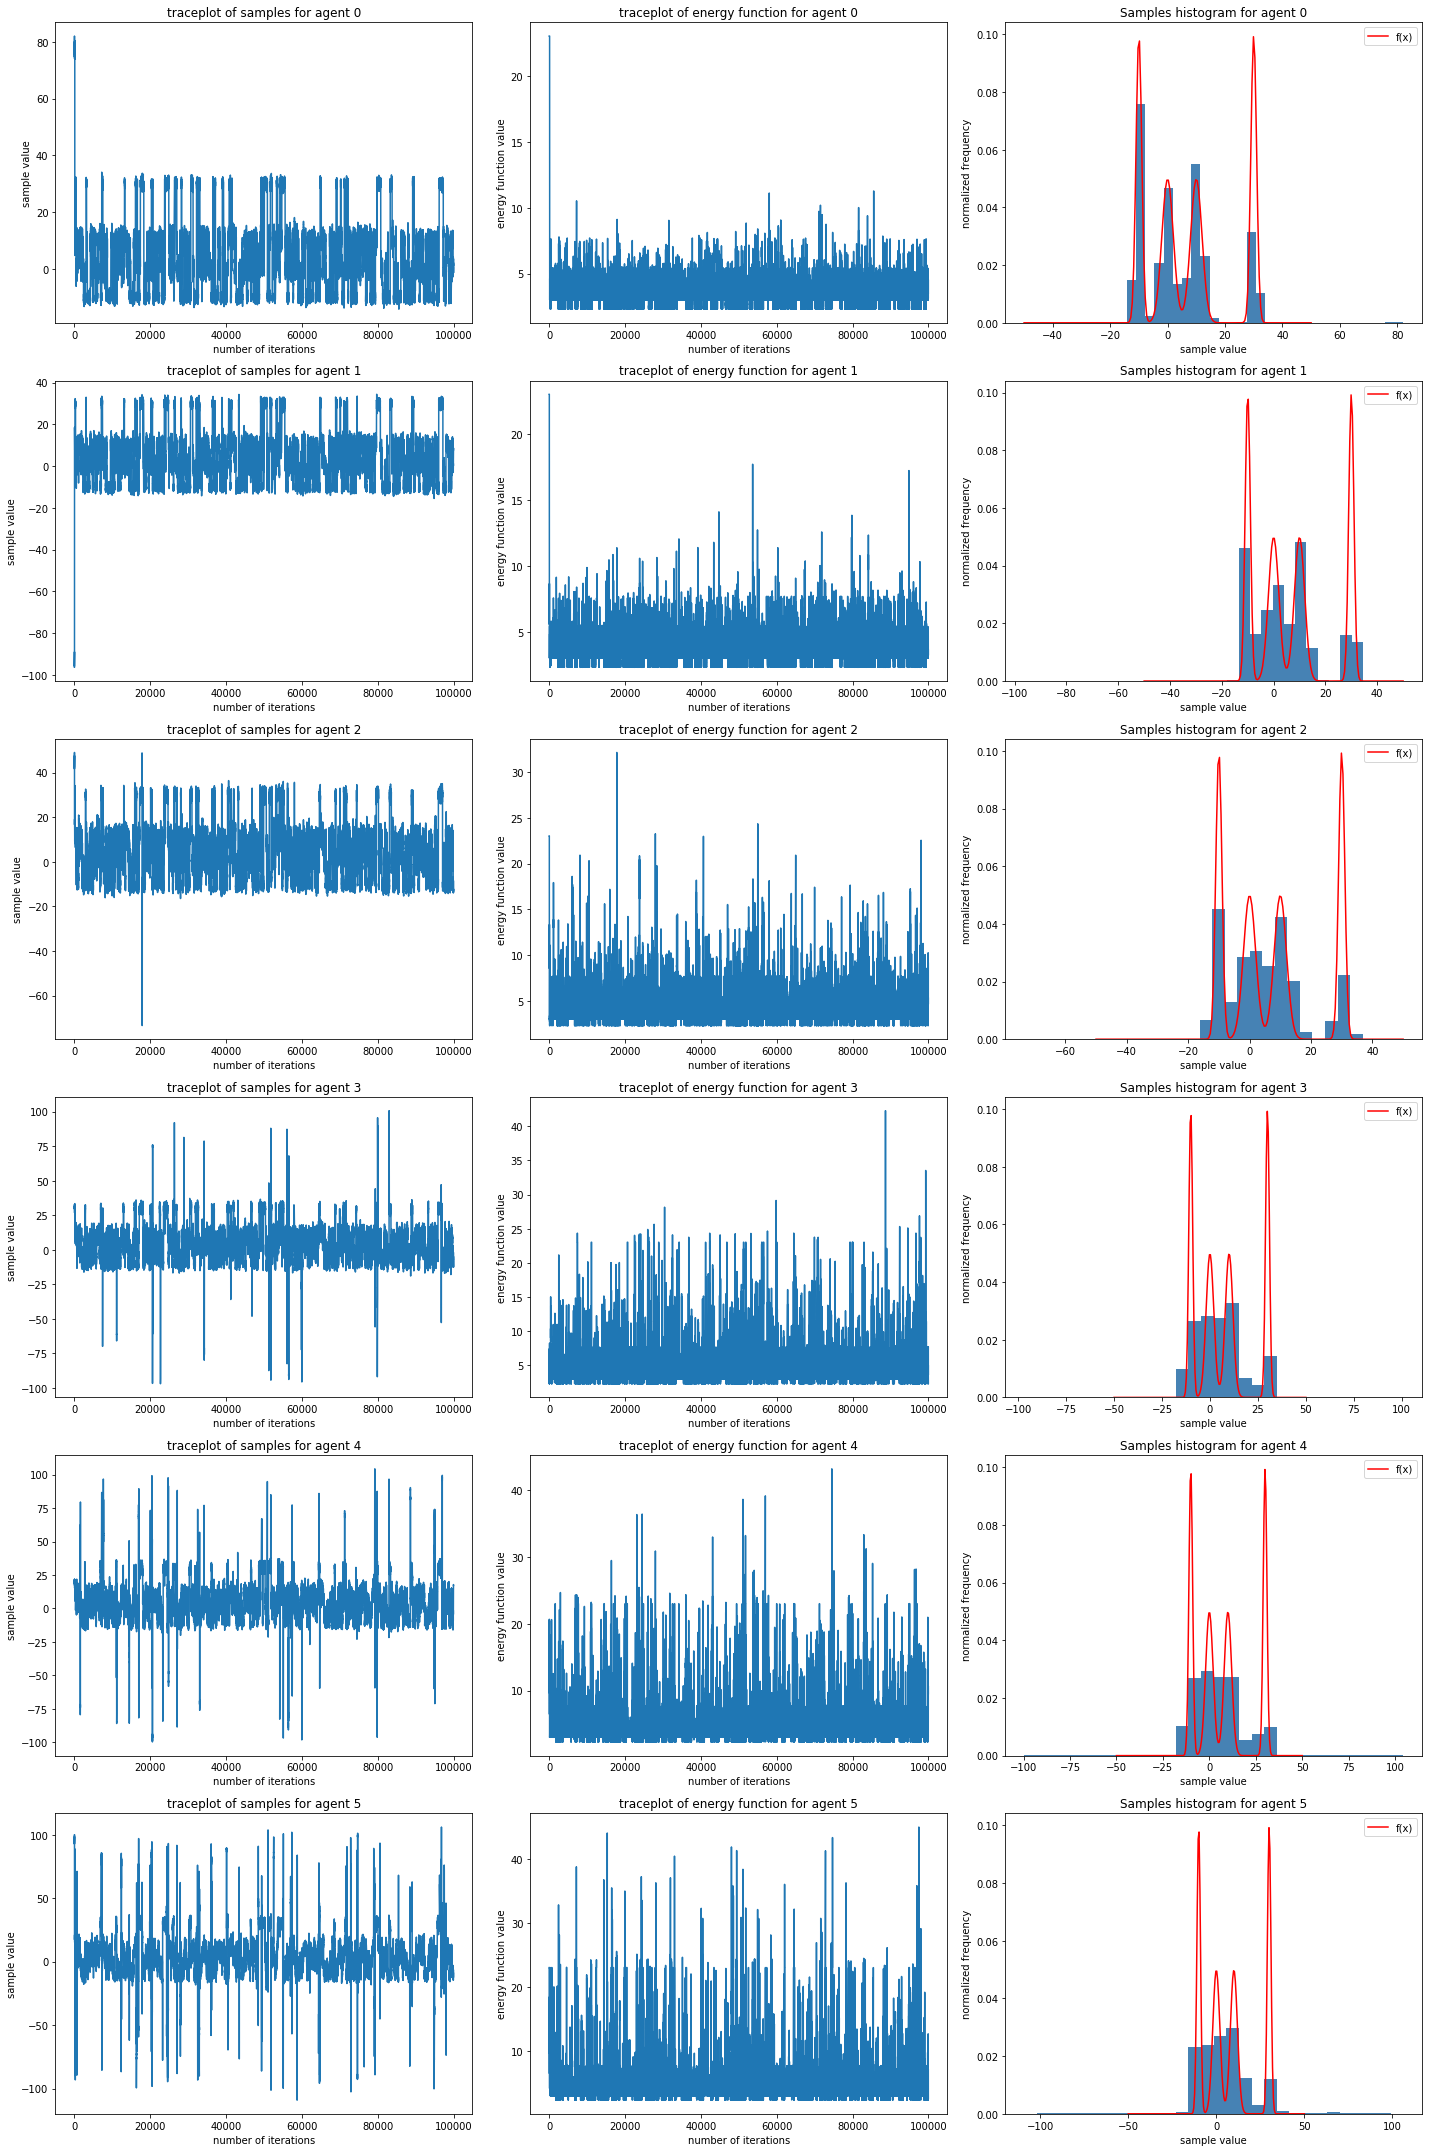

In [132]:
xgrid = np.linspace(-50,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for agent {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for agent {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True, color="steelblue")
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)', color="red")
    ax[3*i+2].set_title(f'Samples histogram for agent {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()

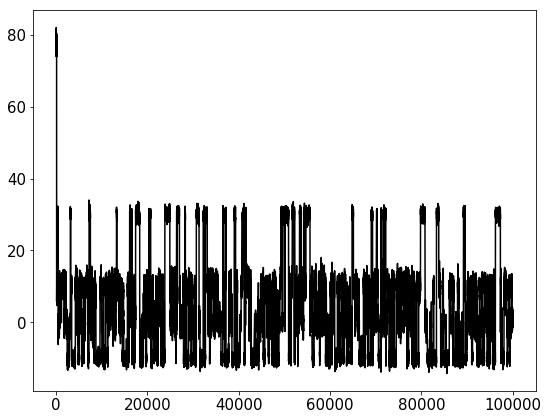

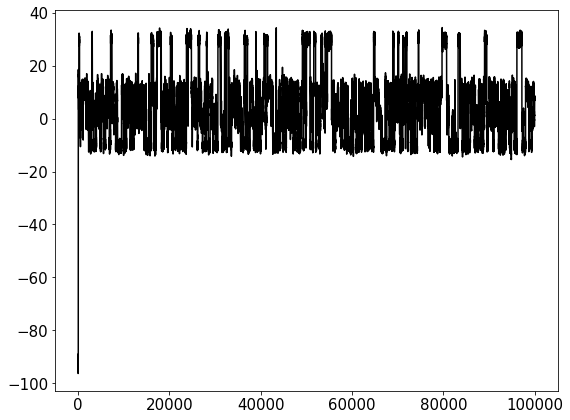

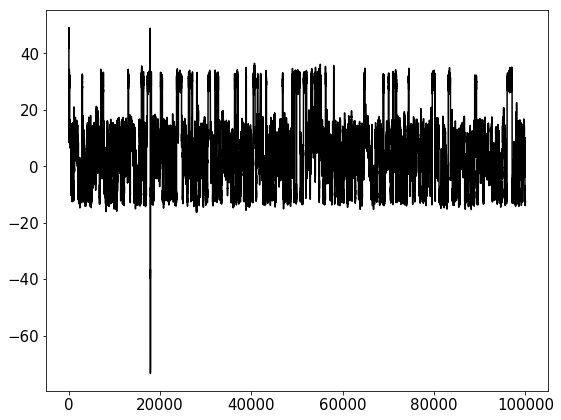

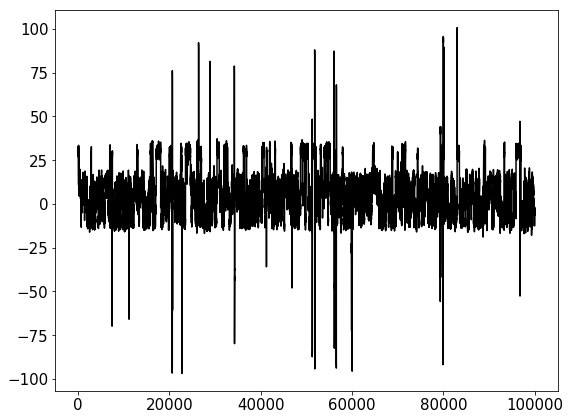

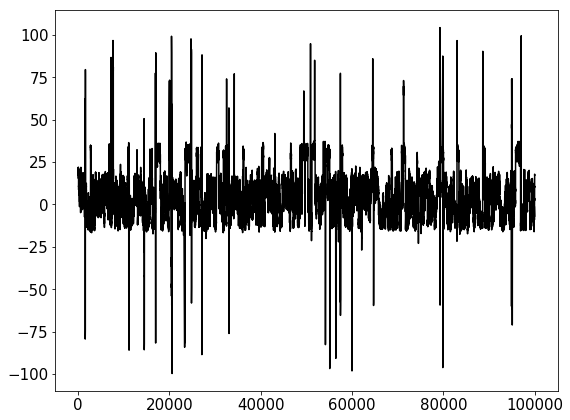

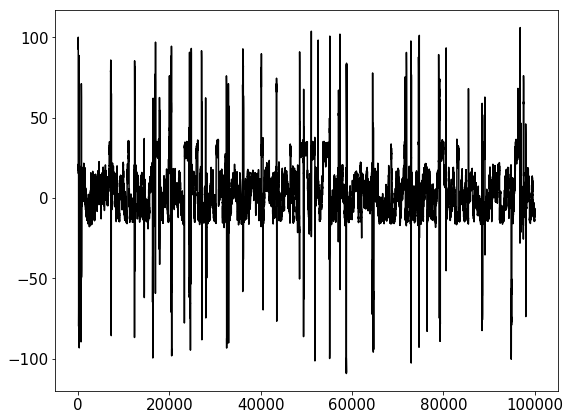

In [133]:
xgrid = np.linspace(-50,50,200)


for i in range(num_chains):
    accumulator = all_results[i]
    plt.figure(figsize=(9,7))
    
    plt.plot(range(num_epochs), accumulator[:,0],color="black")

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.savefig(f"{data_folder}/traceplot_{i}.png", bbox_inches='tight')